In [1]:
import pandas as pd
import numpy as np
import cloudpickle
import sklearn
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

In [2]:
df=pd.read_csv("../../assets/assignment/df_train.csv.gz")

In [3]:
df.head()

,lineage.event_series.id,lineage.event_series.name,lineage.previous_event.id,lineage.previous_event.name,lineage.previous_event.slug,location.name,location.city,location.state,location.zip,location.country_name,...,result.videos,result.finished,result.disqualified,result.duration,photo,event.race.id,clean_category.completed.name,clean_category.registered.name,sequence_id,overall_ranking
0,4d7f441a-4fbc-4a3e-b0d1-4e1b7f000001,Hot Chocolate 15K/5K,56156dc5-e744-40c5-b2ae-5fc0c0a86526,2016 Hot Chocolate 15K/5K - Scottsdale,2016-hot-chocolate-15k-5k-scottsdale,"Scottsdale, AZ",Scottsdale,AZ,NaN,US,...,[],True,False,NaN,NaN,NaN,15k,15k,NaN,2117.0
1,4d7f441a-4fbc-4a3e-b0d1-4e1b7f000001,Hot Chocolate 15K/5K,56156dc5-e744-40c5-b2ae-5fc0c0a86526,2016 Hot Chocolate 15K/5K - Scottsdale,2016-hot-chocolate-15k-5k-scottsdale,"Scottsdale, AZ",Scottsdale,AZ,NaN,US,...,[],True,False,NaN,NaN,NaN,15k,15k,NaN,1343.0
2,4d7f441a-4fbc-4a3e-b0d1-4e1b7f000001,Hot Chocolate 15K/5K,56156dc5-e744-40c5-b2ae-5fc0c0a86526,2016 Hot Chocolate 15K/5K - Scottsdale,2016-hot-chocolate-15k-5k-scottsdale,"Scottsdale, AZ",Scottsdale,AZ,NaN,US,...,[],True,False,NaN,NaN,NaN,15k,15k,NaN,3084.0
3,4d7f441a-4fbc-4a3e-b0d1-4e1b7f000001,Hot Chocolate 15K/5K,56156dc5-e744-40c5-b2ae-5fc0c0a86526,2016 Hot Chocolate 15K/5K - Scottsdale,2016-hot-chocolate-15k-5k-scottsdale,"Scottsdale, AZ",Scottsdale,AZ,NaN,US,...,[],True,False,NaN,NaN,NaN,15k,15k,NaN,3085.0
4,4d7f441a-4fbc-4a3e-b0d1-4e1b7f000001,Hot Chocolate 15K/5K,56156dc5-e744-40c5-b2ae-5fc0c0a86526,2016 Hot Chocolate 15K/5K - Scottsdale,2016-hot-chocolate-15k-5k-scottsdale,"Scottsdale, AZ",Scottsdale,AZ,NaN,US,...,[],True,False,NaN,NaN,NaN,15k,15k,NaN,1241.0


In [4]:
df.shape

(293533, 126)

In [5]:
list(df.columns)

['lineage.event_series.id',
 'lineage.event_series.name',
 'lineage.previous_event.id',
 'lineage.previous_event.name',
 'lineage.previous_event.slug',
 'location.name',
 'location.city',
 'location.state',
 'location.zip',
 'location.country_name',
 'location.country_code',
 'location.coordinates.latitude',
 'location.coordinates.longitude',
 'counts.participants.expected',
 'counts.participants.registered',
 'counts.participants.limit',
 'fundraising.description',
 'fundraising.goal',
 'fundraising.status',
 'fundraising.organizations',
 'fundraising.default_organization.id',
 'fundraising.default_organization.name',
 'time.start',
 'time.end',
 'categories.name',
 'body.id',
 'body.name',
 'body.results_certificate',
 'body.timezone',
 'body.type',
 'body.slug',
 'brackets.id',
 'brackets.name',
 'brackets.type',
 'clean_categories.name',
 'id',
 'registrant_id',
 'user_id',
 'confirmation_number',
 'registration_status',
 'firstname',
 'lastname',
 'age',
 'sex',
 'bib',
 'checkin_

In [6]:
string = 'event'

list = [print(x) for x in df.columns if string in x]

lineage.event_series.id
lineage.event_series.name
lineage.previous_event.id
lineage.previous_event.name
lineage.previous_event.slug
event.id
event.name
event.date.start
event.date.end
event.tenant.id
event.tenant.name
event.timezone
event.location.name
event.location.zip
event.location.coordinates.latitude
event.location.coordinates.longitude
event.images.hub.header
event.images.email.header
event.images.email.footer
event.images.logo
event.description
event.sections
event.results_posted
event.results_certificate
event.photos_available
event.photos_faces
event.photos_social_sharing
event.results_searchable
event.no_bib
event.color
event.sidebar
event.sidebar_elements
event.sharing.twitter.default_text
event.sharing.facebook.default_text
event.sharing.email.default_subject
event.sharing.email.default_body
event.race.id


# Gender Column

In [21]:
df['sex'].value_counts()

Female           197623
Male              95624
NOT SPECIFIED        70
F                    69
M                    38
Unspecified           1
Name: sex, dtype: int64

In [31]:
#Needs cleaning... New column male == 1 

#conditions = [
#     (df['Set'] == 'Z') & (df['Type'] == 'A'),
#     (df['Set'] == 'Z') & (df['Type'] == 'B'),
#     (df['Type'] == 'B')]
# choices = ['yellow', 'blue', 'purple']
# df['color'] = np.select(conditions, choices, default='black')

# df[df["team"].str.contains("A|B")==False]

df = df[df['sex'].str.contains('NOT SPECIFIED|Unspecified')==False]

conditions = [
    (df['sex'] == 'F'),
    (df['sex'] == 'M'),
    (df['sex'] == 'Female'),
    (df['sex'] == 'Male')
]

choices = ['Female','Male','Female','Male']


df['sex_adj'] = np.select(conditions, choices)



In [32]:
df['sex_adj'].value_counts()

Female    197692
Male       95662
Name: sex_adj, dtype: int64

# Age Column

<AxesSubplot:xlabel='age', ylabel='Count'>

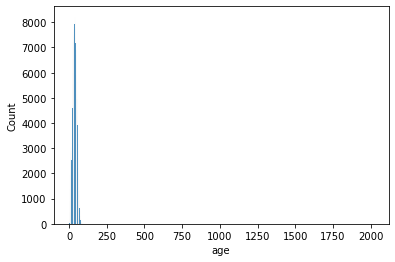

In [25]:
sns.histplot(x=df['age'])

In [38]:
#count over 80... drop anyone over 79. Count is small enough.
df.loc[df['age'] >= 80, 'age'].describe()

count     259.000000
mean      248.061776
std       438.431547
min        80.000000
25%        81.000000
50%        84.000000
75%        99.000000
max      2017.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Density'>

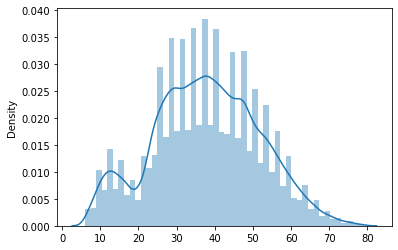

In [8]:
x = df.loc[(df['age'] < 80) & (df['age'] > 5), 'age']
sns.distplot(x = x, hist = True, kde = True)

In [11]:
x.describe()

count    290540.000000
mean         37.783999
std          13.900884
min           6.000000
25%          28.000000
50%          38.000000
75%          48.000000
max          79.000000
Name: age, dtype: float64

In [37]:
#count under 10... no one younger than 5 is going to actually participate. 
#Drop them?
df.loc[df['age'] <= 10, 'age'].describe()

count    7560.000000
mean        8.368519
std         1.875589
min        -1.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: age, dtype: float64

# Distance Column

In [12]:
df['category.registered.distance.quantity'].value_counts()

5.0     150636
15.0     82514
10.0     17117
13.1     14378
26.2      3443
8.0       1773
21.1      1559
5.7       1258
1.0       1102
2.0        840
30.0       352
7.0        235
3.0        225
7.1        163
6.0        161
4.0        159
Name: category.registered.distance.quantity, dtype: int64

In [13]:
df['category.registered.distance.unit'].value_counts()

km    261605
mi     31928
Name: category.registered.distance.unit, dtype: int64

In [53]:
df['category.registered.distance.name'].value_counts()

5K               147351
15K               82514
0K                17618
Half Marathon     14378
10K               11314
10.00 Mile         5803
Marathon           3443
5.00 Mile          3285
21.1K              1559
8.00 Mile          1497
5.70 Mile          1258
1.00 Mile          1102
2.00 Mile           840
30K                 352
8K                  276
7K                  235
3K                  225
7.10 Mile           163
6K                  161
4.00 Mile           159
Name: category.registered.distance.name, dtype: int64

In [16]:
#convert everything to miles... If distance.unit = km, then quantity * .62137

#df['Discount'] = np.where(df['Courses']=='Spark', 1000, 2000)

df['dist_adj'] = np.where(df['category.registered.distance.unit'] == 'km', (df['category.registered.distance.quantity'] * .62137), df['category.registered.distance.quantity'])

In [17]:
df['dist_adj'].value_counts()

3.106850     147351
9.320550      82514
13.100000     14378
6.213700      11314
10.000000      5803
26.200000      3443
5.000000       3285
13.110907      1559
8.000000       1497
5.700000       1258
1.000000       1102
2.000000        840
18.641100       352
4.970960        276
4.349590        235
1.864110        225
7.100000        163
3.728220        161
4.000000        159
Name: dist_adj, dtype: int64

# Location Columns

In [57]:
df['location.country_name'].value_counts()

US    293533
Name: location.country_name, dtype: int64

In [58]:
#One hot encode states?
df['location.state'].value_counts()

IL    88688
MI    34760
OH    23086
CA    20987
AZ    17332
MO    16137
OK    16118
CO    14606
TX    12374
WA     9854
PA     8458
GA     6218
FL     5594
WI     4081
TN     3996
VA     3087
NC     2933
NM     1636
WV     1222
MN     1069
OR      927
IN      370
Name: location.state, dtype: int64

In [59]:
df['location.city'].value_counts()

Chicago             83066
Detroit             18054
Scottsdale          17332
Columbus            17190
St. Louis           16137
                    ...  
Strasburg              76
Bloomfield Hills       76
Montrose               69
Cadiz                  68
Bolivar                52
Name: location.city, Length: 81, dtype: int64

In [67]:
# Add as feature
df['home_state'] = [x[-2:] for x in df['hometown']]
# df['hometown'].value_counts()

df['home_state']

0         CA
1         CA
2         CA
3         CA
4         AZ
          ..
293528    WI
293529    IL
293530    WI
293531    WI
293532    WI
Name: home_state, Length: 293533, dtype: object

In [ ]:
#If home state == event.location, 1, 0 (Does someone have to travel to race?)

# Event Columns

In [20]:
df['event.date.start'].value_counts()

2018-11-04    29788
2017-10-29    25404
2018-10-21    19222
2018-01-07    10866
2018-02-03     9983
              ...  
2018-09-15       78
2017-09-16       77
2018-07-27       76
2018-08-19       69
2018-12-01        4
Name: event.date.start, Length: 102, dtype: int64

In [ ]:
#pull out year, pull out month 

# Duration Columns

In [11]:
df['result.duration.chip'].describe()

count       286342
unique       13191
top       00:32:26
freq           139
Name: result.duration.chip, dtype: object

In [12]:
df['result.finished'].value_counts()

True     286342
False      7191
Name: result.finished, dtype: int64

In [26]:
df['result.duration.chip']

0         01:51:13
1         01:37:40
2         02:18:00
3         02:18:01
4         01:35:45
            ...   
293528    00:28:53
293529    00:30:46
293530    00:31:14
293531    00:30:20
293532    00:33:19
Name: result.duration.chip, Length: 293533, dtype: object

In [25]:
test_df = df.copy()

test_df = test_df[test_df['result.finished'] == False]

test_df[['result.duration.chip','category.completed.distance.quantity','overall_ranking','clean_category.completed.name','clean_category.registered.name']]

,result.duration.chip,category.completed.distance.quantity,overall_ranking,clean_category.completed.name,clean_category.registered.name
1054,NaN,15.0,NaN,15k,15k
8784,NaN,15.0,3459.0,5k,15k
8964,NaN,15.0,2162.0,5k,15k
9166,NaN,15.0,1958.0,5k,15k
9360,NaN,15.0,2893.0,5k,15k
...,...,...,...,...,...
250213,NaN,NaN,16.0,olympic triathlon,olympic triathlon
250235,NaN,NaN,19.0,olympic triathlon,olympic triathlon
250308,NaN,NaN,7.0,sprint triathlon,sprint triathlon
263148,NaN,15.0,NaN,15k,15k


In [ ]:
# Set duration chip to 7+ hrs for anyone who did not finsih... ensure that they will be ranked at the end of the race.

# Event Columns

In [30]:
df['user_id'].value_counts()

548c6d9c-e064-4fe2-8231-4035c0a86526    125
544011b9-12c0-49fe-9da8-0778c0a86526    107
5429c881-da48-4092-8a31-23c6c0a86526     86
5ad615d9-ec1c-4d14-aca3-358d5206f5f9     85
5b09aacb-f328-4c76-96e8-0ffd5206f5f9     78
                                       ... 
5bd2018f-8058-47a6-9299-35f75206f5f9      1
59f384e3-9d74-461a-887a-66355206f5f9      1
5814e32f-2028-4a56-acc2-66925206f5f9      1
522c70b0-be84-48ff-9aa2-265dc0a86524      1
5ba5b321-e954-4e7b-8a98-48ae5206f5f9      1
Name: user_id, Length: 194995, dtype: int64